In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [483]:
df = pd.read_csv('housing_prices.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [484]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [485]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [487]:
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [488]:
num_vals = df.select_dtypes(include=[int,float]).columns
num_vals

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

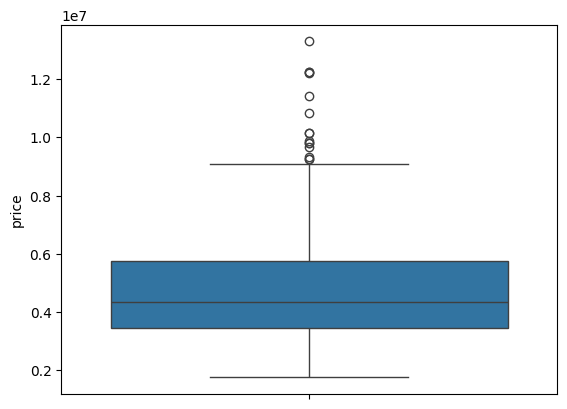

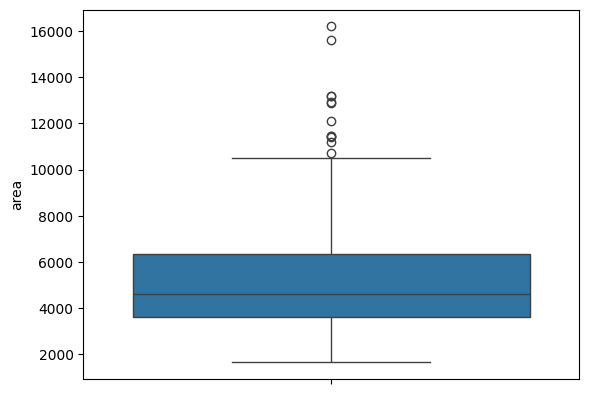

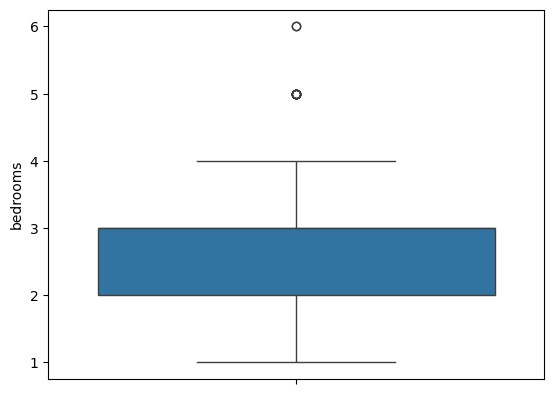

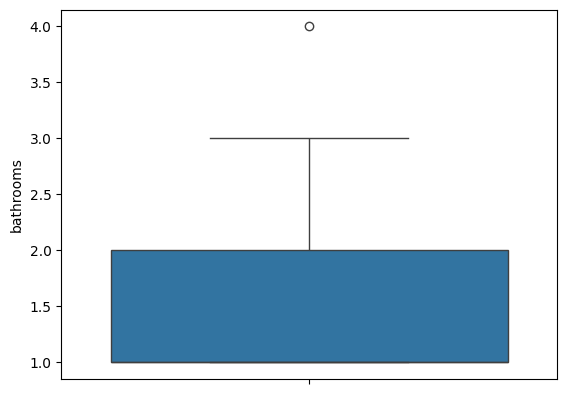

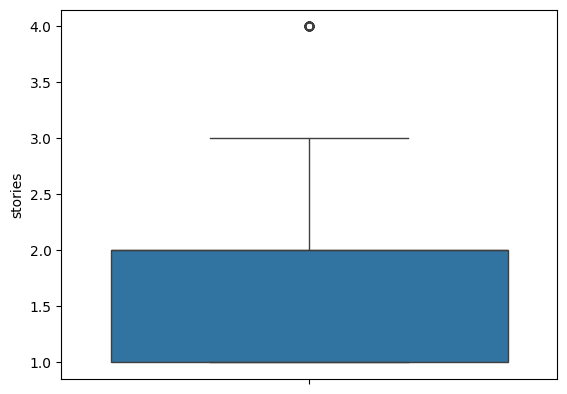

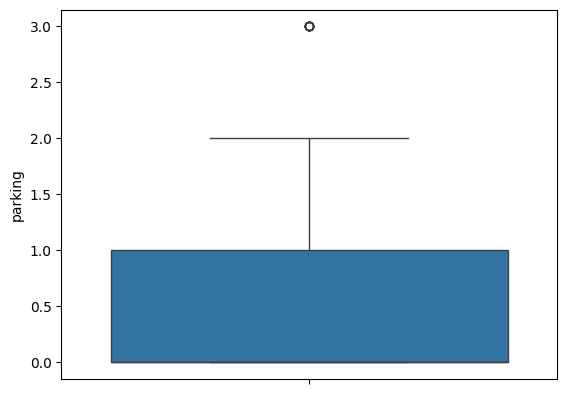

In [489]:
for col in num_vals:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()

In [490]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cate_vals = df.select_dtypes(include='object').columns

print(cate_vals)

LabelEncoder = LabelEncoder()

for i in cate_vals:
    df[i] = LabelEncoder.fit_transform(df[i])
    
df.to_csv('Preprocessed_houseprices.csv')

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [491]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


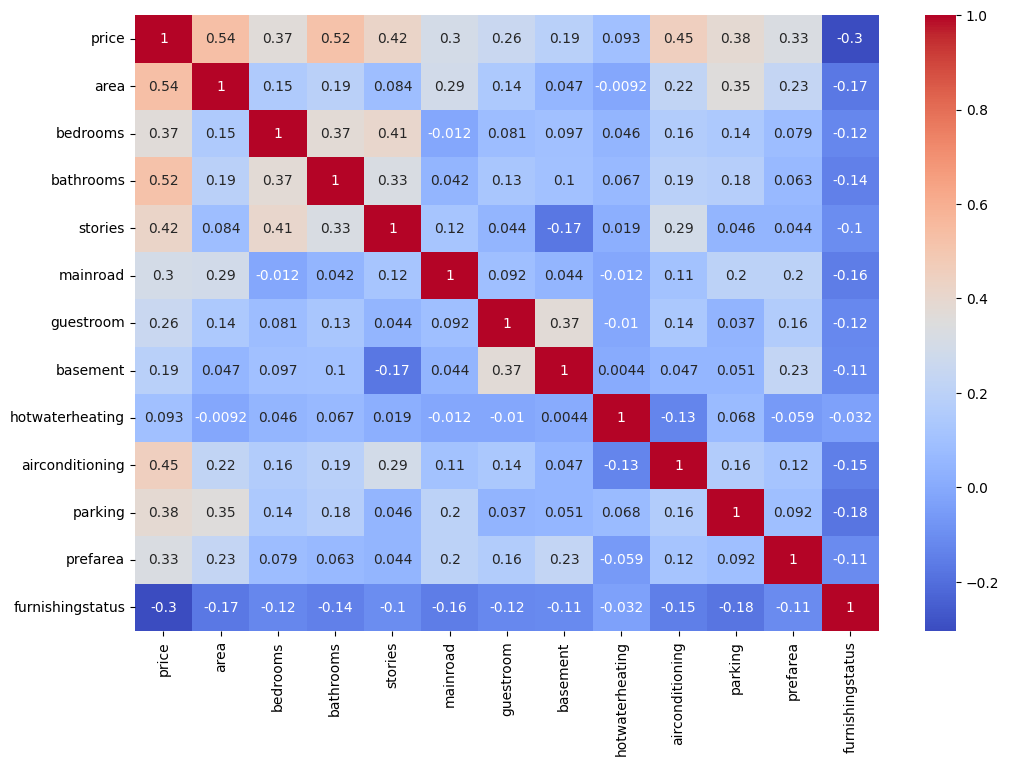

In [492]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)
plt.show()

In [493]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['area'] = scaler.fit_transform(df[['area']])
df['price'] = scaler.fit_transform(df[['price']])

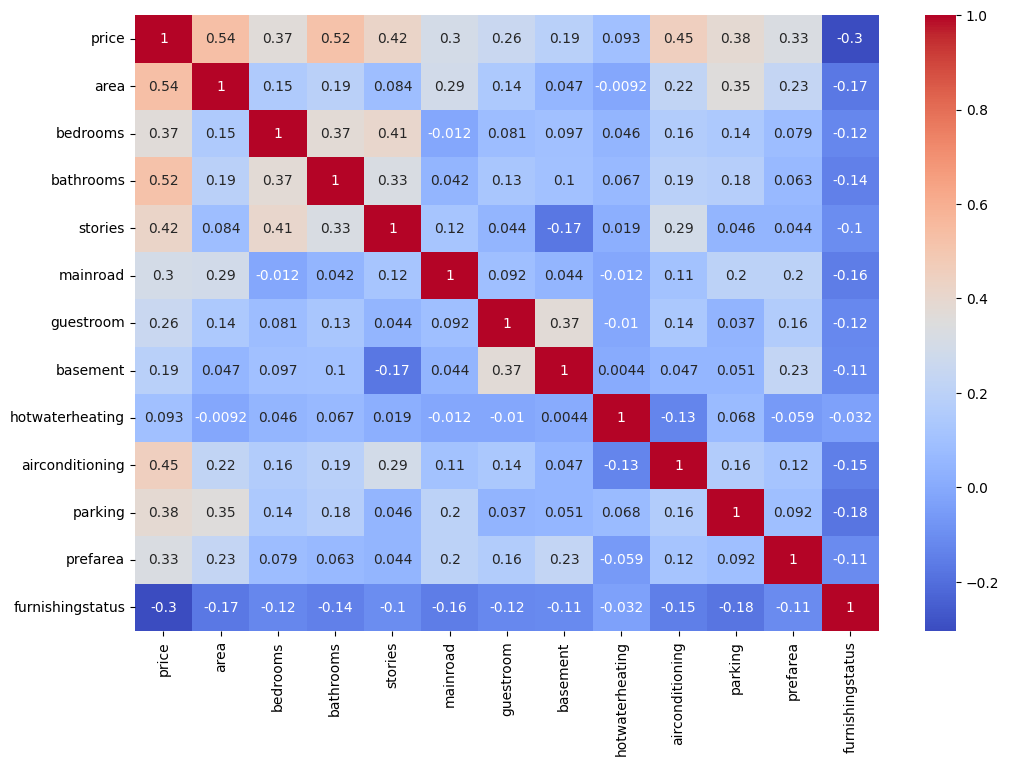

In [494]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)
plt.show()

In [495]:
threshold = 0.3

correlation_target = corr_matrix.loc['price'].abs()
selected_features = correlation_target[correlation_target > threshold].index
selected_features = [feature for feature in selected_features if feature != 'price']

print("Selected features based on correlation threshold:")
print(selected_features)

Selected features based on correlation threshold:
['area', 'bedrooms', 'bathrooms', 'stories', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [496]:
x = df[selected_features]
y = df['price']

In [497]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [498]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

In [499]:
def model_perform(model):
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model.__class__.__name__} MSE: {mse}')
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{model.__class__.__name__} MAE: {mae}')
    
    r_squared = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__} R-squared: {r_squared}')
    
    
    return model

In [500]:
linear_regression = LinearRegression()
linear_model = model_perform(linear_regression)

LinearRegression MSE: 0.5509105971637484
LinearRegression MAE: 0.5499240146204423
LinearRegression R-squared: 0.6193843234997255


In [501]:
DTR = DecisionTreeRegressor(random_state=12)
DTR_model = model_perform(DTR)

DecisionTreeRegressor MSE: 1.205276773524826
DecisionTreeRegressor MAE: 0.7496043453883594
DecisionTreeRegressor R-squared: 0.16729277511271867


In [502]:
RFR = RandomForestRegressor(random_state=42)
RFR_model = model_perform(RFR)

RandomForestRegressor MSE: 0.5877929173091145
RandomForestRegressor MAE: 0.5547975346775288
RandomForestRegressor R-squared: 0.593902894561346


In [503]:
GBR = GradientBoostingRegressor(random_state=42)
GBR_model = model_perform(GBR)

GradientBoostingRegressor MSE: 0.5669061236224836
GradientBoostingRegressor MAE: 0.5482438973116938
GradientBoostingRegressor R-squared: 0.6083332597601402


In [504]:
SVR = SVR(kernel='linear')
SVR_model = model_perform(SVR)

SVR MSE: 0.5777607549499639
SVR MAE: 0.5537440914394467
SVR R-squared: 0.6008339615670397
